# When curse of dimensionality is a problem—and when it is not


**How the unintuitive nature of hyperdimensions make the distance between points become almost equal.**

Jon Tingvold · 2017

Curse of dimensionality is a well-known problem in machine learning techniques such as k-nearest neighbor, k-means, collaborative filtering, clustering algorithms, different vector space model in search engines, and other places that use distance metrics to measure how similar two objects are, such as users, documents, movies or other data objects. Why curse of dimensionality is a problem, and when it is a problem, is, however, often poorly communicated.

#### The solution space increases exponentially
A basic premise for (k) nearest neighbor to work, is that there actually is a neighboring object near the objects we are looking at. However, as many knows, additional dimensions increase the solution space exponentially, and huge data sets are required for points to find neighboring points that are actually close. To take a simple example, if a point is to find a neighbor object that is less than 0.1 units away in a unit cube and the objects are uniformly distributed, we need more than 100 objects in two dimensions, 1000 objects in three dimensions, 1 million objects are required with six dimensions and 1 billion by nine dimensions.

#### All objects converge to be equally different
A common mistake is to think that it is not so important with neighboring points in immediate proximity because we can always measure the distance between points, and find the *closest* objects. But, as we shall see, such a ranking does not make sense in higher dimensions. In fact, all other objects will be almost exactly the same distance apart from another, as in Figure 1.

<figure style="float:right">
    <img src="curse-of-dim.png" width="200">
    <figcaption><strong>Figure 1</strong> Illustrative figure</figcaption>
</figure>

This is an unintuitive property of hyper-dimensions. If we imagine a hypersphere around a point and then begin to expand it as a soap bubble, the "volume" will increase dramatically (yes, more than dramatically) as we inflate the bubble. Remember, with eight dimensions, the "volume" will increases by $r^8$! So much will the volume increase, that if we increase the radius one notch, there will be more "volume" in the increased portion than it was in the original bubble. Most of the volume will always be at the outer part of the hypersphere, close to the edge. Thus, all the other objects are likely to be in the outer part, like a shell, about as far away from each other. And, the crazy thing is that, from all the objects' perspective, it will look the same. From all objects view, it will look like the other objects are distributed as a ball around one's self.

In this file, I have simulated the distance between two random points in a hypersphere with different distance metrics. As you will see, the distance between points converges to be approximately the same with multiple dimensions.

#### When increased dimensionality is good
However, there is an area where many dimensions are good. If we are to distinguish between different clusters in a dataset, increased dimensionality will make it easier to separate the clusters from each other, as long as the clusters are modestly scattered. (See the last figure)

High dimensionality might also not be such a big problem if the objects are not distributed uniformly, but only in smaller parts of the solution space. The closer the points are to each other, the increase in the space around them will be dramatically reduced. It will be easier to find neighboring points that are actually in the immediate proximity, and since the actual space the points accumulate together is smaller, a smaller proportion of the points will be in the "outer most shell" of each point.

#### Conclusion
Distance measurements are thus in higher dimensionality only useful for measuring whether two points are actually close to each other, but not to rank points that are far away. In many dimensions the chance you will find a close neighbor is vanishingly small, and futher away all points have almost the same distance.

It is therefore crusual to remove irrelevant factors and and flatten the solution space with dimensionality reduction techniques like singular value decomposition.

In [1]:
# Hide warnings
import warnings
warnings.filterwarnings('ignore')


import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import pairwise
import scipy

from IPython.display import display, HTML, Image, Video

# Create high resolution plots
%config InlineBackend.figure_format = 'retina'

# Matplotlib style sheet
plt.style.use('seaborn-pastel')

## Manhatten distance between two random (uniform) points in a hypercube

Let's plot the distance between randomly drawn points and see how they distribute with increased dimensionality.

The size of the hypercube is $1/d$-unit-wide on all sides where $d$ is the dimentionality. This normalizes the vector length across dimensions, so the maximum distance in the cube is 1.0 for all dimensions. This does not change the result, but it makes the distances easier to compare across dimensions.

In [2]:
def get_random_distances(n_points, dimentions,
                    distance_metric=pairwise.manhattan_distances, 
                    vector_transform=lambda vec,d: 1/float(d)*vec,
                    distance_transform=lambda vec: vec,
                    remove_same_points=True):
    n = n_points

    df = pd.DataFrame()

    for d in dimentions:
        # Draw random uniform vectors with length 0.0–1.0
        random_vectors = vector_transform(np.random.uniform(0, 1, size=(n, d)), d)

        distance_matrix = distance_metric(random_vectors, random_vectors)
        
        if remove_same_points:
            np.fill_diagonal(distance_matrix, np.nan) # Remove same
        
        distances = distance_matrix.reshape(n*n) # Flatten matrix
        distances = distances[~np.isnan(distances)]
        distances = distance_transform(distances)

        # Insert distances into dataframe
        df["%i dimentions" % d] = distances
        
    return df

,Mean,Standard deviation:
1 dimentions,0.330305,0.233430
2 dimentions,0.348723,0.171890
3 dimentions,0.326636,0.133214
5 dimentions,0.328169,0.104238
8 dimentions,0.323540,0.077943
13 dimentions,0.324448,0.064266
21 dimentions,0.338577,0.052204
100 dimentions,0.332021,0.023133


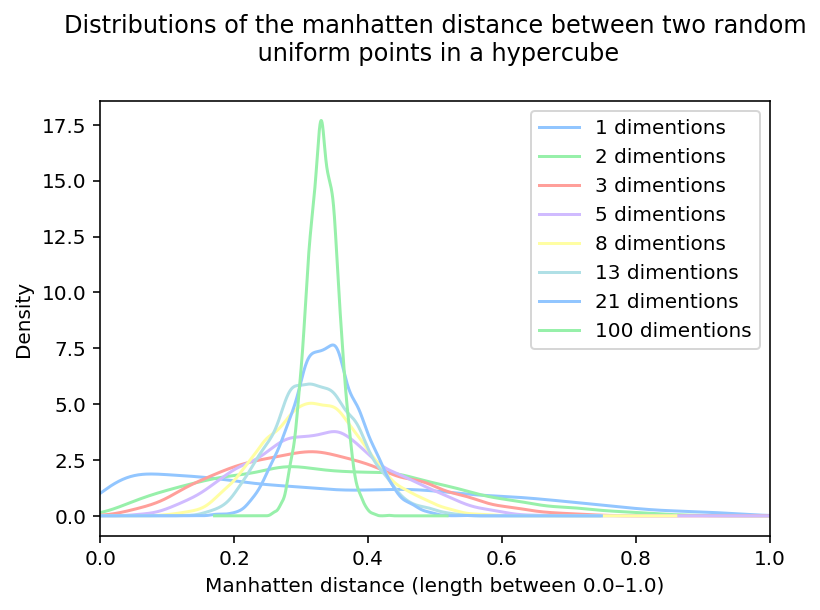

In [3]:
df = get_random_distances(
    n_points=100, 
    dimentions = (1,2,3,5,8,13,21,100),
    distance_metric=pairwise.manhattan_distances, 
    vector_transform=lambda vec,d: 1/float(d)*vec,
)
    
fig = df.plot(kind='density')
fig.set_title("Distributions of the manhatten distance between two random\n uniform points in a hypercube\n")
fig.set_xlabel("Manhatten distance (length between 0.0–1.0)")
fig.set_xlim(0, 1)

fig;

pd.DataFrame({"Mean":df.mean(), "Standard deviation:":df.std()})

**Figure 2**

We can see that in high dimensions there are almost no neighboring points. When the dimensionality increases the distance between points converges to the same distance around 0.33...  

Unless you have an enormous database, the likelihood that you will find a similar point to another is vanishingly small. It also makes little sense to rank points and find the *most similar*, because all points are exactly as dissimilar to each other. 

The distribution looks like a normal distribution. This is as expected. The manhatten distance used here between two points $\mathbf{X}_1$ and $\mathbf{X}_2$ is $d(\mathbf{X}_1,\mathbf{X}_2)=\frac{1}{d}\sum_i^d{|X_{i,1}-X_{i,2}|}$. If we threat $|X_{i,1}-X_{i,2}|$ as a random variable and we use the central limit theorem, which says a large sum of i.i.d (idential, independent distributed) random variables will converage to a normal distribution no matter how $|X_{i,1}-X_{i,2}|$ is distributed, we will see that the distance must be normally distributed when $d \rightarrow \infty$. 

The standard deviation will fall proportionally with $1/\sqrt{d}$.

## Same problem with other distance metrics

#### Euclidian distance

Although, the euclidian distance is harder to analyze formally, the same happens.

The size of the hypercube is set to $\sqrt{1/d}$-unit to normalizes the vector length across dimensions.

,Mean,Standard deviation:
1 dimentions,0.341767,0.240202
2 dimentions,0.365600,0.175003
3 dimentions,0.367502,0.142096
5 dimentions,0.395012,0.109100
8 dimentions,0.398325,0.087844
13 dimentions,0.404776,0.065040
21 dimentions,0.405172,0.054167
100 dimentions,0.410480,0.024299


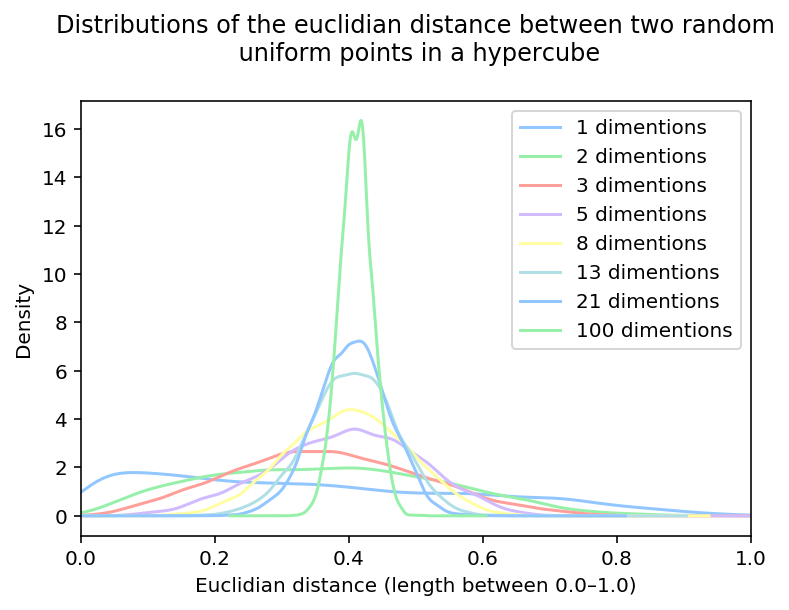

In [4]:
df = get_random_distances(
    n_points=100, 
    dimentions = (1,2,3,5,8,13,21,100),
    distance_metric=pairwise.euclidean_distances, 
    vector_transform=lambda vec,d: 1/math.sqrt(d)*vec,
)
    
fig = df.plot(kind='density')
fig.set_title("Distributions of the euclidian distance between two random\n uniform points in a hypercube\n")
fig.set_xlabel("Euclidian distance (length between 0.0–1.0)")
fig.set_xlim(0, 1)

fig;

pd.DataFrame({"Mean":df.mean(), "Standard deviation:":df.std()})

The same happens for euclidian distance, although the mean converges to a larger point.

#### Cosine distance

,Mean,Standard deviation:
2 dimentions,90.065332,52.011073
3 dimentions,89.614254,38.981768
5 dimentions,90.031170,28.231793
8 dimentions,90.023413,21.763242
13 dimentions,89.997325,16.610017
21 dimentions,90.138909,12.627923
100 dimentions,89.860786,5.798112


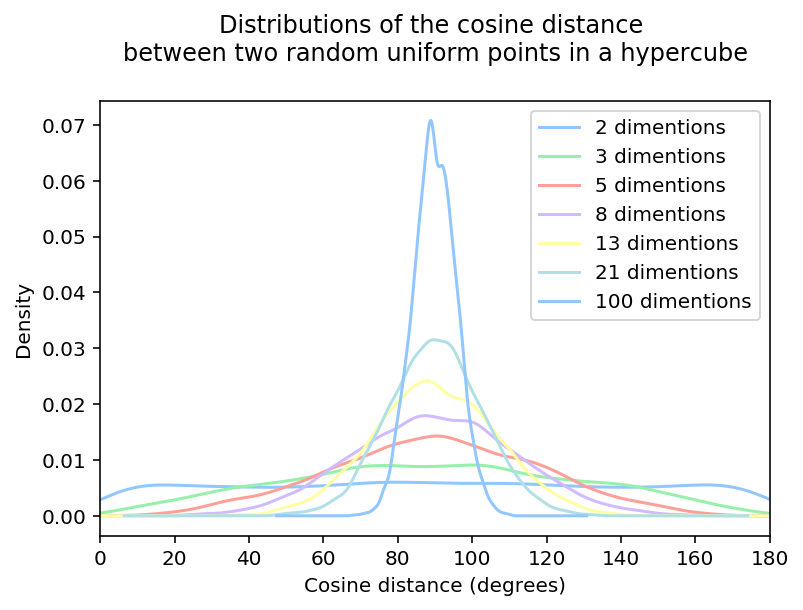

In [5]:
df = get_random_distances(
    n_points=100, 
    dimentions = (2,3,5,8,13,21,100),
    distance_metric=pairwise.cosine_similarity, 
    vector_transform=lambda vec,d: vec - 0.5,
    distance_transform=lambda vec: np.degrees(np.arccos(vec))
)
    
fig = df.plot(kind='density')
fig.set_title("Distributions of the cosine distance \nbetween two random uniform points in a hypercube\n")
fig.set_xlabel("Cosine distance (degrees)")
fig.set_xlim(0, 180)

fig;

pd.DataFrame({"Mean":df.mean(), "Standard deviation:":df.std()})

The same happens for the cosine similarity. Here the distance between two points converges to 90 degrees.

### Same problem with normal distributed points

,Mean,Standard deviation:
1 dimentions,1.176515,0.872085
2 dimentions,1.341388,0.756523
3 dimentions,1.217155,0.529940
5 dimentions,1.461850,0.452855
8 dimentions,1.397629,0.339391
13 dimentions,1.411342,0.291366
21 dimentions,1.399516,0.221729
100 dimentions,1.415674,0.094049


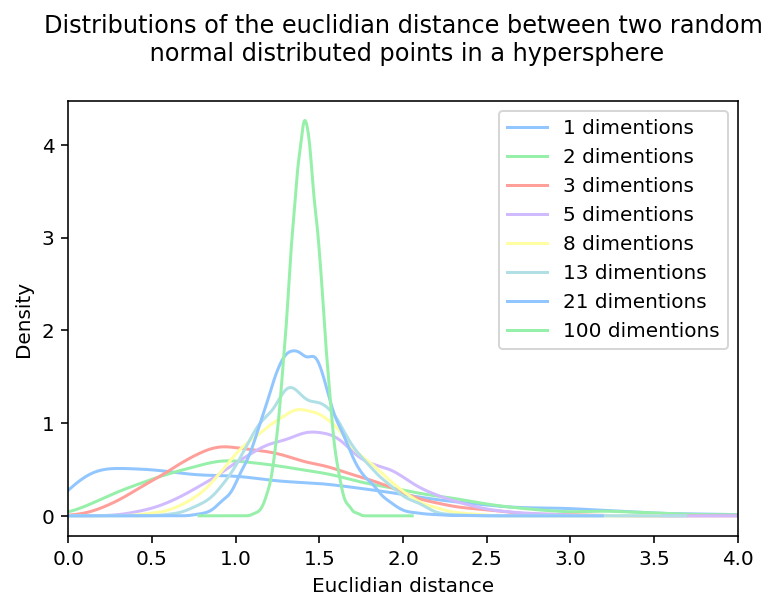

In [6]:
n = 100
dimentions = (1,2,3,5,8,13,21,100)

df = pd.DataFrame()

for d in dimentions:
    
    # Draw random uniform vectors with length 0.0–1.0
    random_vectors = 1/math.sqrt(d)*np.random.multivariate_normal(np.zeros(d), cov=np.identity(d), size=n) # n x d

    distance_matrix = pairwise.euclidean_distances(random_vectors, random_vectors)
    np.fill_diagonal(distance_matrix, np.nan) # Remove same
    distences = distance_matrix.reshape(n*n) # Flatten matrix
    
    # Insert distances into dataframe
    df["%i dimentions" % d] = distences
    
fig = df.plot(kind='density')
fig.set_title("Distributions of the euclidian distance between two random\n normal distributed points in a hypersphere\n")
fig.set_xlabel("Euclidian distance")
fig.set_xlim(0, 4)

fig;

pd.DataFrame({"Mean":df.mean(), "Standard deviation:":df.std()})

The same problem happens if the points are distributed normally (multivariate normal).

The distance converge towards $\sqrt{2}=1.41$. 

## Distance between different clusters

There is a use-case where nearest neighbors and distance metrics are useful even in higher dimensions. If the dataset is clustered, distance metrics are still adequate to detect the difference between clusters.

However, if we try to measure the difference between points in the same cluster, it is basically the same as measuring the difference between normally drawn points, and you have the same problem as before,  although you have reduced the solution space, so the problem is less severe.

#### The distance between points the in the same normally distributed cluster and other random clusters in a $\sqrt{1/d}$-unit hypersphere



In [7]:
def get_random_cluster_with_points(d, st_d, n):
    cov = st_d * np.identity(d) * 1/math.sqrt(d) # d x d
    
    # Pick a random cluster from a uniform distribution
    random_cluster_center = np.random.uniform(0, 1/math.sqrt(d), size=d)
    
    # Draw normal random points around cluster
    random_points_in_cluster_vec = np.random.multivariate_normal(mean=random_cluster_center, cov=cov, size=n) # n_per_c x d
    
    return random_points_in_cluster_vec
 
def distance_between_points(matrix1, matrix2):
    distance_matrix = pairwise.euclidean_distances(matrix1, matrix2)
    np.fill_diagonal(distance_matrix, np.nan) # Remove same
    n = distance_matrix.shape[0]
    dist = distance_matrix.reshape(n*n) # Flatten matrix
    return dist

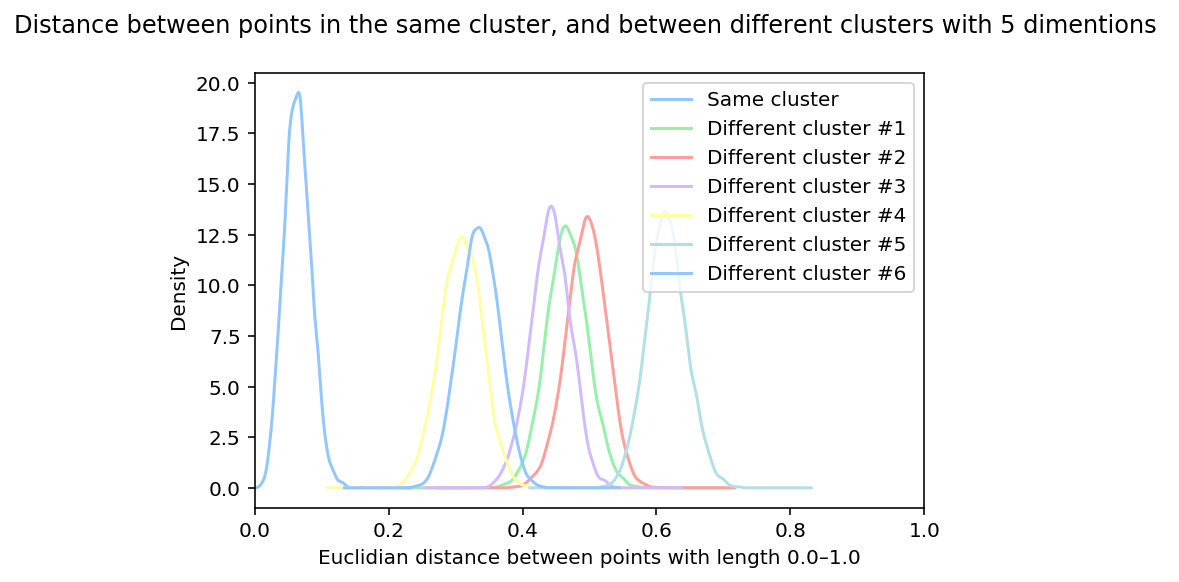

In [8]:
d = 5
st_d = 0.001
n_clusters = 6
n_per_cluster = 100

df = pd.DataFrame()

primary_cluster = get_random_cluster_with_points(d, st_d, n_per_cluster)

df["Same cluster"] = distance_between_points(primary_cluster, primary_cluster)

for i in range(n_clusters):
    new_cluster = get_random_cluster_with_points(d, st_d, n_per_cluster)
    df["Different cluster #%i" % (i+1)] = distance_between_points(primary_cluster, new_cluster)
    
fig = df.plot(kind='density')
fig.set_title("Distance between points in the same cluster, and between different clusters with 5 dimentions \n")
fig.set_xlabel("Euclidian distance between points with length 0.0–1.0")
fig.set_xlim(0, 1)

fig;

The distance between points in the same cluster (blue) and points in other clusters (other colors) is large enough that you can use distance metrics to differentiate between clusters, as long as the clusters are narrow enough (standard deviation inside the cluster is low).

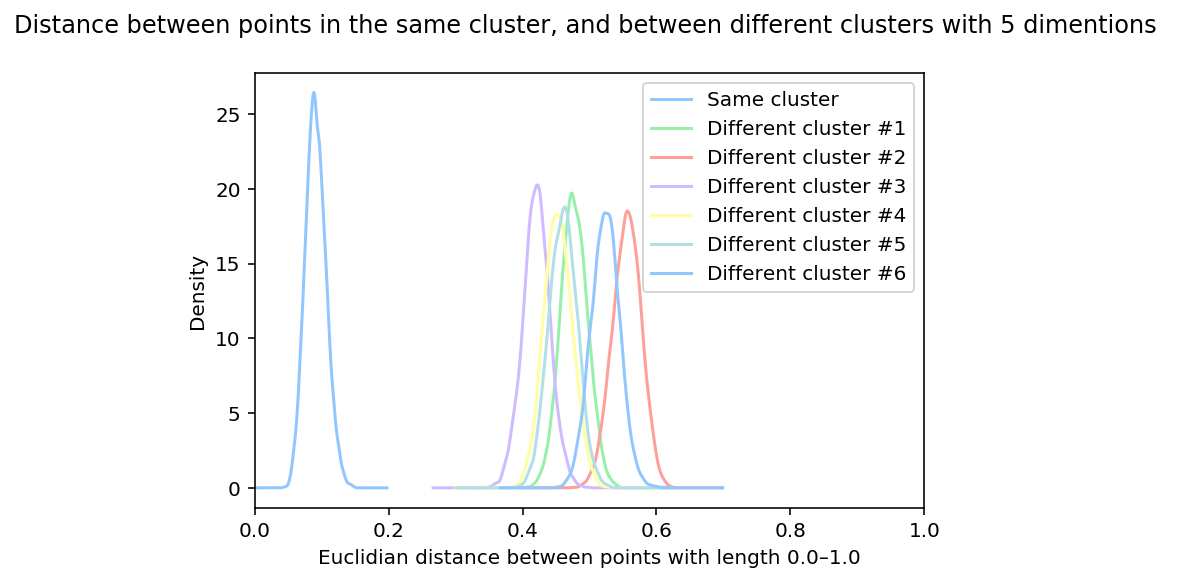

In [9]:
d = 20
st_d = 0.001
n_clusters = 6
n_per_cluster = 100

df = pd.DataFrame()

primary_cluster = get_random_cluster_with_points(d, st_d, n_per_cluster)

df["Same cluster"] = distance_between_points(primary_cluster, primary_cluster)

for i in range(n_clusters):
    new_cluster = get_random_cluster_with_points(d, st_d, n_per_cluster)
    df["Different cluster #%i" % (i+1)] = distance_between_points(primary_cluster, new_cluster)
    
fig = df.plot(kind='density')
fig.set_title("Distance between points in the same cluster, and between different clusters with 5 dimentions \n")
fig.set_xlabel("Euclidian distance between points with length 0.0–1.0")
fig.set_xlim(0, 1)

fig;

The difference actually increases with more dimensions, so here many dimensions is a good thing.